In [1]:
library(caret)
library(dplyr) #easy data processing
library(ggplot2) #visuals
library(effects)#calculate and display model estimates
library(sjPlot) #plot estimate
library(MuMIn) #r.squaredGLMM
library(lme4) #random effect
library(lmerTest) #like lmer but with p-value
library(webshot) #save model output
library(glmnet) #lasso regression to select features
#library(ggpubr) #ggscatter

Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'effects' was built under R version 4.0.5"
Loading required package: carData

Use the command
    lattice::trellis.par.set(effectsTheme())
  to customize lattice options for effects plots.
See ?effectsTheme for details.

Warning message:
"package 'sjPlot' was built under R version 4.0.4"
Learn more about sjPlot with 'browseVignettes("sjPlot")'.

Warning message:
"package 'MuMIn' was built under R version 4.0.5"
Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


Warning message:
"package 'webshot' was built under R version 4.0.5"
Warning message:
"packa

In [2]:
#df_ = df[ which(df$PenID %in% c('pen3','pen4','pen5','pen10','pen11','pen12')), ]  

# Download data

In [3]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_/Adaptability'
#df = read.csv(file.path(path_,'Adaptability_Stat.csv'), header = TRUE, sep = ";") #old
df = read.csv(file.path(path_,'df_MVT_4stat.csv'), header = TRUE, sep = ";")
#df$'#of the first 3 days with 4 zone visited' = df$nbr_days_4zonevisited
#df$'mean % of time spent in lower perch' = df$mean_perc_duration_3_Zone
#df$'mean % of time spent in WG' = df$mean_percentage_time_outside_while_WG_open
#df$Person_feather = as.factor(df$Person_feather)   
df$PenID = as.factor(df$PenID) 
df$RPen = as.factor(df$RPen) 
df$Treatment = as.factor(df$Treatment) 
df$CLASS = as.factor(df$CLASS) 
#df$perc_1_Zone_while_WG_open_10 = df$perc_1_Zone_while_WG_open/10
#df$perc_duration_5_Zone_10 = df$perc_duration_5_Zone /10
df$InitialWeight = df$InitialWeight_kg*1000
df$perc_gain_weight = (df$weight-df$InitialWeight)/df$InitialWeight*100
df$FeatherDamage = 100-df$Feathers
df$FeathersHA2Damage = 100-df$FeathersHA2
print(dim(df))
summary(df)
head(df,3)

[1] 80 24


    HenID           perc_1_Zone_while_WG_open vertical_travel_distance_perh
 Length:80          Min.   : 0.000            Min.   :0.8571               
 Class :character   1st Qu.: 0.000            1st Qu.:2.8101               
 Mode  :character   Median : 2.022            Median :3.6129               
                    Mean   : 4.868            Mean   :3.5730               
                    3rd Qu.: 7.727            3rd Qu.:4.3238               
                    Max.   :37.811            Max.   :6.1538               
                                                                           
 perc_duration_5_Zone InitialWeight_kg RPen   nbr_nbrzonevisisted_over_3days
 Min.   : 1.00        Min.   :1.046    1:22   Min.   : 3.0                  
 1st Qu.:14.75        1st Qu.:1.130    2:20   1st Qu.: 7.0                  
 Median :30.25        Median :1.166    3:19   Median :10.0                  
 Mean   :34.61        Mean   :1.169    4:19   Mean   : 9.2                  
 3rd Qu

,HenID,perc_1_Zone_while_WG_open,vertical_travel_distance_perh,perc_duration_5_Zone,InitialWeight_kg,RPen,nbr_nbrzonevisisted_over_3days,BehaviouralType,BLUP_slopes1,BLUP_slopes2,...,severity,weight,Feathers,FeathersHA2,severityEndEarlyMvt,weightEndEarlyMvt,InitialWeight,perc_gain_weight,FeatherDamage,FeathersHA2Damage
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,hen_10,0.0000000,1.933333,35.0,1.070,1,7,-0.3662305,0.37903978,0.18964307,...,40,1713.4,67.00000,93.33333,34,1488.3,1070,60.13084,33.00000,6.666667
2,hen_101,1.3728070,4.000000,10.0,1.082,3,7,0.6696666,-0.31852209,0.01414739,...,28,1755.3,72.66667,89.00000,0,1625.7,1082,62.22736,27.33333,11.000000
3,hen_102,0.4186992,1.000000,86.5,1.158,3,6,-1.2881750,0.07662226,0.11913673,...,50,2042.7,61.66667,86.33333,0,1855.1,1158,76.39896,38.33333,13.666667


# Linear mixed effect model

In [4]:
#FEATHERS
#test other fixed effects
#we will keep the treatment, and believe that it will have all info needed from rearing pen, laying pen. 
#CLASS might not be reliable
modeltestinit = lmer(FeatherDamage ~ 1 + (1|PenID), REML = FALSE, data = df)
summary(modeltestinit)
r.squaredGLMM(modeltestinit)

modeltest1 = lmer(FeatherDamage ~ Treatment + (1|PenID), REML = FALSE, data = df)
summary(modeltest1)
r.squaredGLMM(modeltest1)

modeltest2 = lmer(FeatherDamage ~  CLASS + (1|PenID), REML = FALSE, data = df)
summary(modeltest2)
r.squaredGLMM(modeltest2)

modeltest3 = lmer(FeatherDamage ~ RPen + (1|PenID), REML = FALSE, data = df)
summary(modeltest3)
r.squaredGLMM(modeltest3)

summary(modeltestinit)$logLik
summary(modeltest1)$logLik
summary(modeltest2)$logLik
summary(modeltest3)$logLik

#The lower the AIC value, the more parsimonious the fit of the model is to the data
anova(modeltest1, modeltestinit, test="Chisq")
anova(modeltest2, modeltestinit, test="Chisq")
anova(modeltest3, modeltestinit, test="Chisq")
#LRT : p>0.05--> use simpler model

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: FeatherDamage ~ 1 + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
   600.7    607.8   -297.3    594.7       76 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1926 -0.6493  0.0257  0.6295  2.4311 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 22.97    4.792   
 Residual             96.35    9.816   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   34.233      2.028  7.924   16.88 1.71e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message:
"'r.squaredGLMM' now calculates a revised statistic. See the help page."


R2m,R2c
0,0.1924899


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: FeatherDamage ~ Treatment + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
   602.7    612.2   -297.3    594.7       75 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.18563 -0.65087  0.01909  0.63422  2.42451 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 22.93    4.789   
 Residual             96.34    9.815   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
              Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)    34.0084     2.8496  7.7532  11.934  2.9e-06 ***
TreatmentTRAN   0.4556     4.0544  7.9358   0.112    0.913    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
TretmntTRAN -0.703

R2m,R2c
0.0004397905,0.1926247


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: FeatherDamage ~ CLASS + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
   603.4    615.3   -296.7    593.4       74 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.05285 -0.69386  0.04841  0.62100  2.31238 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 24.13    4.913   
 Residual             94.33    9.712   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   32.481      2.680 21.411  12.118 4.71e-11 ***
CLASSMEXP      2.993      2.634 71.414   1.137    0.260    
CLASSOther     1.635      2.930 72.171   0.558    0.579    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
           (Intr) CLASSM
CLASSMEXP  -0.588       
CLASSOther -0.531  0.538

R2m,R2c
0.01316784,0.2142198


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: FeatherDamage ~ RPen + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
   606.6    620.8   -297.3    594.6       73 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.14501 -0.62782  0.02951  0.65522  2.42009 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 22.82    4.777   
 Residual             96.25    9.811   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  33.5664     3.1770 11.9846  10.565 1.99e-07 ***
RPen2         0.9705     4.5737 12.8091   0.212    0.835    
RPen3         0.9663     3.0931 71.7503   0.312    0.756    
RPen4         0.8236     4.5833 12.8463   0.180    0.860    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
      (Intr) RPen2  RPen3 
RPen2 -0.695     

R2m,R2c
0.001473457,0.1928421


'log Lik.' -297.3459 (df=3)

'log Lik.' -297.3396 (df=4)

'log Lik.' -296.7077 (df=5)

'log Lik.' -297.2898 (df=6)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
modeltestinit,3,600.6918,607.8002,-297.3459,594.6918,NA,NA,NA
modeltest1,4,602.6792,612.1570,-297.3396,594.6792,0.01262185,1,0.9105483


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
modeltestinit,3,600.6918,607.8002,-297.3459,594.6918,NA,NA,NA
modeltest2,5,603.4154,615.2626,-296.7077,593.4154,1.276482,2,0.5282207


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
modeltestinit,3,600.6918,607.8002,-297.3459,594.6918,NA,NA,NA
modeltest3,6,606.5796,620.7963,-297.2898,594.5796,0.1122194,3,0.9903318


In [5]:
#KBF SEVERITY
#test other fixed effects
#we will keep the treatment, and believe that it will have all info needed from rearing pen, laying pen. 
#CLASS might not be reliable
#bounderies issue with REML=FALSE for all modeltest1*, so we used REML=TRUE and p-values of estiamtes instead of LRT.
modeltestinit = lmer(severity ~ 1 + (1|PenID), REML = TRUE, data = df)
summary(modeltestinit)
r.squaredGLMM(modeltestinit)

modeltest1 = lmer(severity ~ Treatment + (1|PenID), REML = TRUE, data = df)
summary(modeltest1)
r.squaredGLMM(modeltest1)

modeltest2 = lmer(severity ~  CLASS + (1|PenID), REML = TRUE, data = df)
summary(modeltest2)
r.squaredGLMM(modeltest2)

modeltest3 = lmer(severity ~ RPen + (1|PenID), REML = TRUE, data = df)
summary(modeltest3)
r.squaredGLMM(modeltest3)

summary(modeltestinit)$logLik
summary(modeltest1)$logLik
summary(modeltest2)$logLik
summary(modeltest3)$logLik

#The lower the AIC value, the more parsimonious the fit of the model is to the data
#REML = FALSE if comparing fixed effects! anova will do it autamatically, but no error of the model will be thrown if any!
#anova(modeltest1, modeltestinit, test="Chisq")
#anova(modeltest2, modeltestinit, test="Chisq")
#anova(modeltest3, modeltestinit, test="Chisq")
#LRT : p>0.05--> use simpler model

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ 1 + (1 | PenID)
   Data: df

REML criterion at convergence: 660.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.91697 -0.72111 -0.02994  0.53173  3.09813 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)  13.74    3.707  
 Residual             226.16   15.039  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   35.676      2.139  7.841   16.68  2.1e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R2m,R2c
0,0.05726597


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ Treatment + (1 | PenID)
   Data: df

REML criterion at convergence: 652.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.89070 -0.70423 -0.00411  0.59410  2.96669 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   2.883   1.698  
 Residual             226.128  15.038  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
              Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)     39.302      2.500  6.431  15.722 2.26e-06 ***
TreatmentTRAN   -7.209      3.576  6.662  -2.016   0.0857 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
TretmntTRAN -0.699

R2m,R2c
0.0543024,0.0662081


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ CLASS + (1 | PenID)
   Data: df

REML criterion at convergence: 650

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7859 -0.7205 -0.0297  0.5242  3.2031 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)  12.74    3.57   
 Residual             229.74   15.16   
Number of obs: 80, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   37.942      3.355 36.580  11.311 1.68e-13 ***
CLASSMEXP     -4.031      4.050 71.835  -0.995    0.323    
CLASSOther    -1.963      4.501 73.333  -0.436    0.664    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
           (Intr) CLASSM
CLASSMEXP  -0.710       
CLASSOther -0.640  0.528

R2m,R2c
0.01192273,0.0638464


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ RPen + (1 | PenID)
   Data: df

REML criterion at convergence: 642

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.94284 -0.67907 -0.04123  0.59720  2.85367 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   3.511   1.874  
 Residual             230.536  15.183  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   40.538      3.371 18.401  12.026 3.72e-10 ***
RPen2         -7.852      4.878 19.522  -1.610   0.1236    
RPen3         -2.695      4.761 72.711  -0.566   0.5731    
RPen4         -9.073      4.943 19.953  -1.836   0.0814 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
      (Intr) RPen2  RPen3 
RPen2 -0.691              
RPen3 -0.653  0.451       
RPen4 -0.682  0.508  0.445

R2m,R2c
0.05731605,0.07145773


'log Lik.' -330.0769 (df=3)

'log Lik.' -326.1452 (df=4)

'log Lik.' -325.0041 (df=5)

'log Lik.' -320.9811 (df=6)

In [6]:
#WEIGHT
#test other fixed effects
#we will keep the treatment, and believe that it will have all info needed from rearing pen, laying pen. 
#CLASS might not be reliable
modeltestinit = lmer(weight ~ 1 + (1|PenID), REML = FALSE, data = df)
summary(modeltestinit)
r.squaredGLMM(modeltestinit)

modeltest1 = lmer(weight ~ Treatment + (1|PenID), REML = FALSE, data = df)
summary(modeltest1)
r.squaredGLMM(modeltest1)

modeltest2 = lmer(weight ~  CLASS + (1|PenID), REML = FALSE, data = df)
summary(modeltest2)
r.squaredGLMM(modeltest2)

modeltest3 = lmer(weight ~ RPen + (1|PenID), REML = FALSE, data = df)
summary(modeltest3)
r.squaredGLMM(modeltest3)

summary(modeltestinit)$logLik
summary(modeltest1)$logLik
summary(modeltest2)$logLik
summary(modeltest3)$logLik

#The lower the AIC value, the more parsimonious the fit of the model is to the data
anova(modeltest1, modeltestinit, test="Chisq")
anova(modeltest2, modeltestinit, test="Chisq")
anova(modeltest3, modeltestinit, test="Chisq")
#LRT : p>0.05--> use simpler model

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: weight ~ 1 + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  1047.5   1054.6   -520.7   1041.5       77 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.34708 -0.69937  0.02475  0.66494  2.44915 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   319     17.86  
 Residual             26084    161.51  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 1908.811     19.155    8.798   99.65 9.73e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R2m,R2c
0,0.01208245


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: weight ~ Treatment + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  1049.5   1059.0   -520.7   1041.5       76 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3473 -0.6996  0.0250  0.6648  2.4489 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   319.3   17.87  
 Residual             26083.9  161.51  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   1.909e+03  2.679e+01 8.448e+00  71.259 4.84e-13 ***
TreatmentTRAN 9.307e-02  3.832e+01 8.752e+00   0.002    0.998    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
TretmntTRAN -0.699

R2m,R2c
8.300819e-08,0.01209396


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: weight ~ CLASS + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  1050.5   1062.4   -520.3   1040.5       75 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.22608 -0.72715  0.06632  0.60678  2.59196 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   368.9   19.21  
 Residual             25723.3  160.38  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 1921.155     33.486   50.123  57.372   <2e-16 ***
CLASSMEXP    -32.695     42.792   74.336  -0.764    0.447    
CLASSOther     5.944     47.441   76.417   0.125    0.901    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
           (Intr) CLASSM
CLASSMEXP  -0.750       
CLASSOther -0.677  0.529

R2m,R2c
0.0120285,0.02599801


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: weight ~ RPen + (1 | PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  1052.7   1067.0   -520.4   1040.7       74 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.20723 -0.73030  0.02874  0.72444  2.33239 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   460.5   21.46  
 Residual             25718.4  160.37  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  1913.77      35.85   23.46  53.388   <2e-16 ***
RPen2         -25.59      51.86   24.85  -0.493    0.626    
RPen3         -10.84      50.30   74.82  -0.216    0.830    
RPen4          17.58      52.55   25.39   0.334    0.741    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
      (Intr) RPen2  RPen3 
RPen2 -0.691            

R2m,R2c
0.009272947,0.02669967


'log Lik.' -520.7393 (df=3)

'log Lik.' -520.7393 (df=4)

'log Lik.' -520.2564 (df=5)

'log Lik.' -520.3711 (df=6)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
modeltestinit,3,1047.479,1054.625,-520.7393,1041.479,NA,NA,NA
modeltest1,4,1049.479,1059.007,-520.7393,1041.479,5.855388e-06,1,0.9980693


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
modeltestinit,3,1047.479,1054.625,-520.7393,1041.479,NA,NA,NA
modeltest2,5,1050.513,1062.423,-520.2564,1040.513,0.9659407,2,0.6169481


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
modeltestinit,3,1047.479,1054.625,-520.7393,1041.479,NA,NA,NA
modeltest3,6,1052.742,1067.034,-520.3711,1040.742,0.7365423,3,0.864577


# Feathers

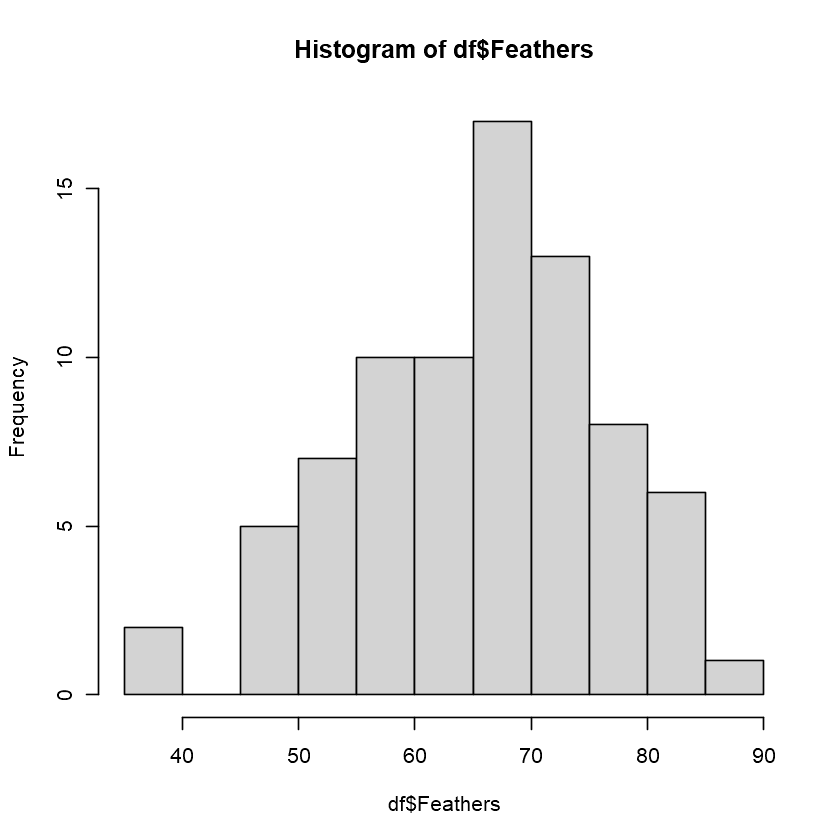

In [7]:
hist(df$Feathers)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
FeathersHA2Damage,208.728,208.728,1,73.54316,2.182529,0.1438547


(Intercept) FeathersHA2Damage 
       32.9165129         0.3733704

R2m,R2c
0.0238914,0.2413567


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: FeatherDamage ~ FeathersHA2Damage + (1 | PenID)
   Data: df

REML criterion at convergence: 583.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.04230 -0.63027  0.03847  0.68868  2.49930 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 27.41    5.236   
 Residual             95.64    9.779   
Number of obs: 78, groups:  PenID, 8

Fixed effects:
                  Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)        32.9165     2.3551  9.5712  13.977  1.1e-07 ***
FeathersHA2Damage   0.3734     0.2527 73.5432   1.477    0.144    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
FthrsHA2Dmg -0.397

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


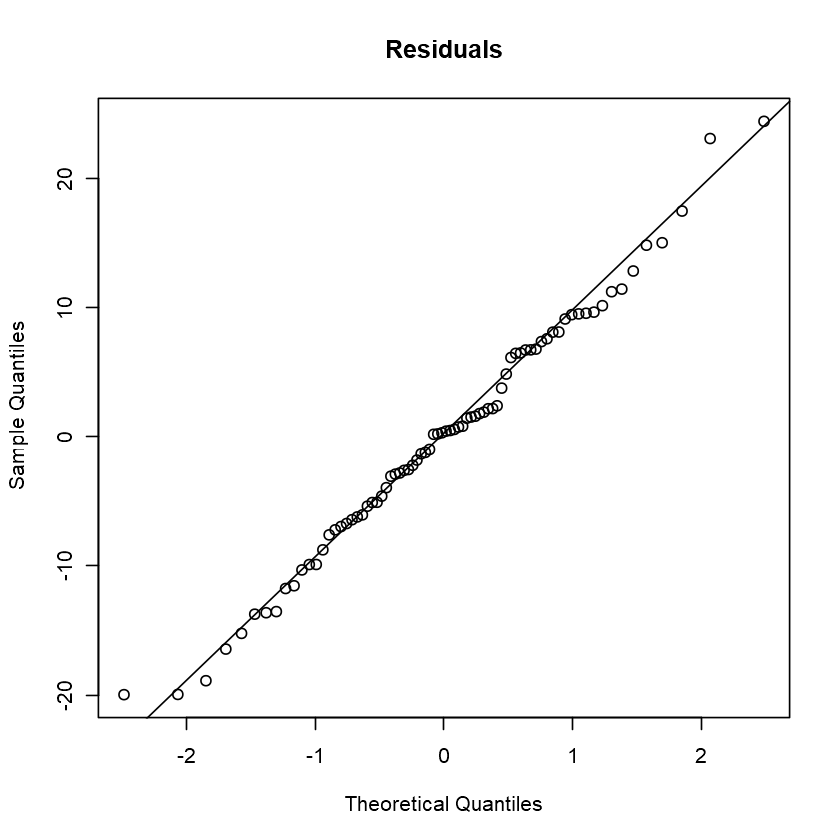

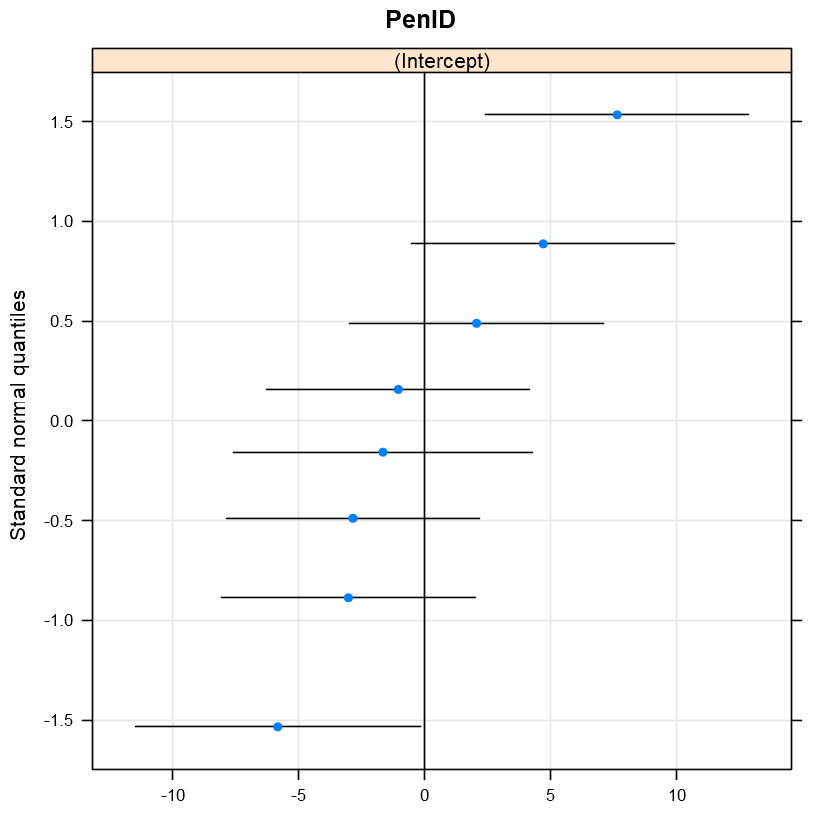

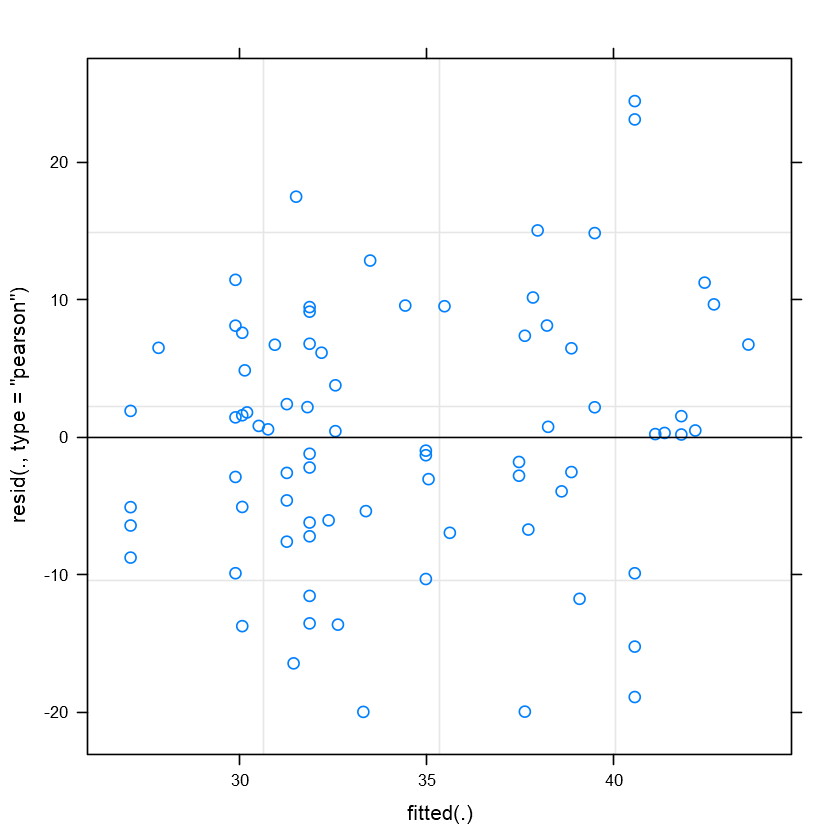

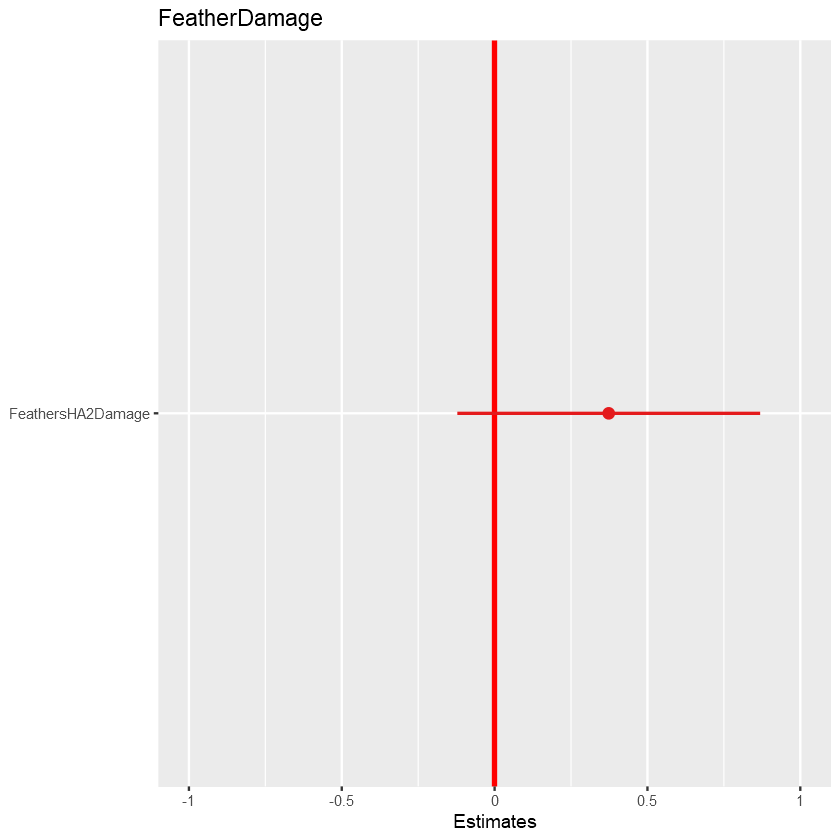

In [8]:
fit = lmerTest::lmer(FeatherDamage ~  FeathersHA2Damage + (1|PenID), data=df)
fit_feather = fit
anova(fit)
effCoef(fit)
r.squaredGLMM(fit_feather)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_nbrzonevisisted_over_3days,9.014151,9.014151,1,70.71196,0.10091817,0.751666769
perc_duration_5_Zone,12.946072,12.946072,1,68.28268,0.14493809,0.704602256
perc_1_Zone_while_WG_open,654.780561,654.780561,1,67.82244,7.33061317,0.008570657
BLUP_slopes1,2.701634,2.701634,1,66.27701,0.03024622,0.862462856
BLUP_slopes2,354.364585,354.364585,1,69.74444,3.96729813,0.050308972
Predictability_mean,50.190985,50.190985,1,71.21393,0.56191450,0.455959119


(Intercept) nbr_nbrzonevisisted_over_3days 
                   31.73207671                     0.15209082 
          perc_duration_5_Zone      perc_1_Zone_while_WG_open 
                   -0.01946938                    -0.43917783 
                  BLUP_slopes1                   BLUP_slopes2 
                   -0.51768597                    11.54574361 
           Predictability_mean 
                    3.79964617

R2m,R2c
0.1151134,0.3207752


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
FeatherDamage ~ nbr_nbrzonevisisted_over_3days + perc_duration_5_Zone +  
    perc_1_Zone_while_WG_open + BLUP_slopes1 + BLUP_slopes2 +  
    Predictability_mean + (1 | PenID)
   Data: df

REML criterion at convergence: 571.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.06496 -0.70423 -0.02896  0.56904  2.29183 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 27.05    5.201   
 Residual             89.32    9.451   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
                               Estimate Std. Error       df t value Pr(>|t|)
(Intercept)                    31.73208    8.68870 71.46553   3.652 0.000492
nbr_nbrzonevisisted_over_3days  0.15209    0.47876 70.71196   0.318 0.751667
perc_duration_5_Zone           -0.01947    0.05114 68.28268  -0.381 0.704602
perc_1_Zone_while_WG_open      -0.43918    0.16221 67.82244  -2.708 

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


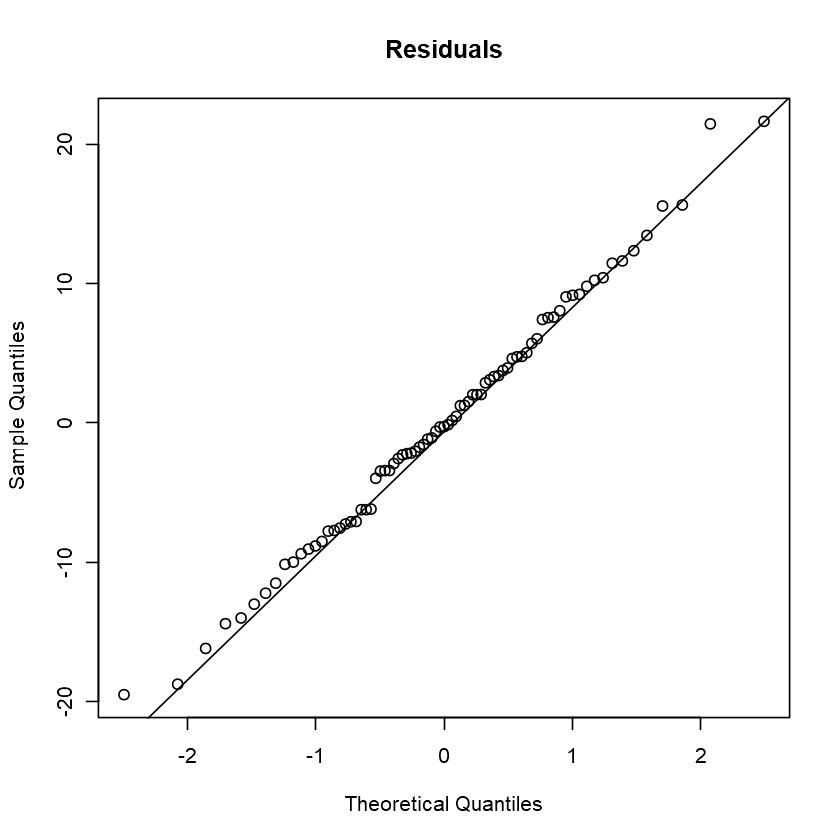

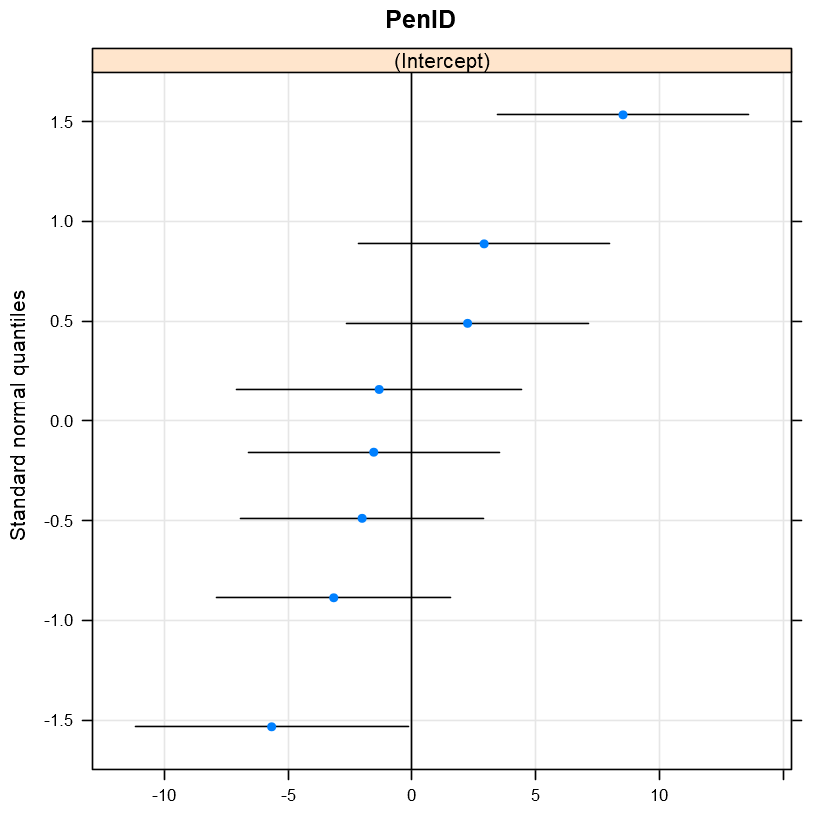

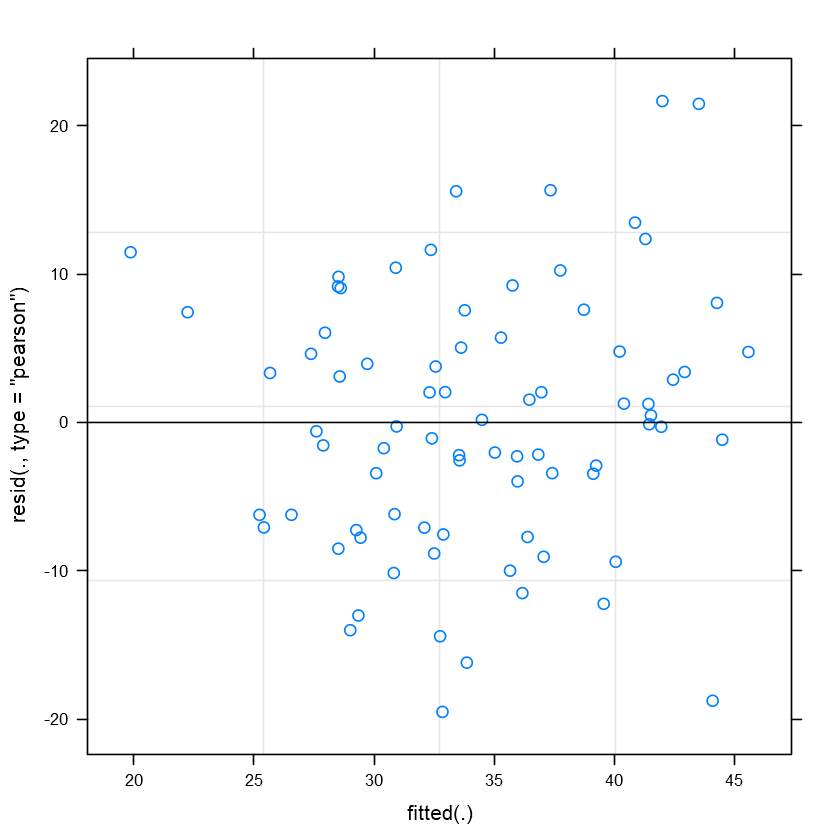

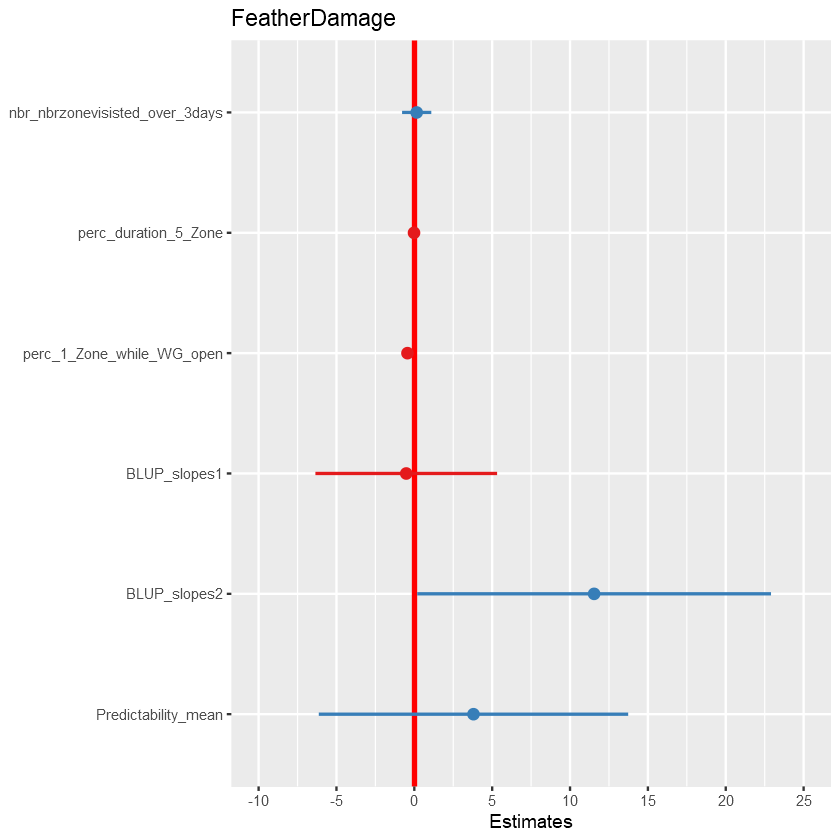

In [9]:
fit = lmerTest::lmer(FeatherDamage ~  nbr_nbrzonevisisted_over_3days + perc_duration_5_Zone + perc_1_Zone_while_WG_open + BLUP_slopes1 + BLUP_slopes2 + Predictability_mean + (1|PenID), data=df)
fit_feather = fit
anova(fit)
effCoef(fit)
r.squaredGLMM(fit_feather)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

###stable with LASSO score with bootstrap
set.seed(123)    
li_mvt = c('nbr_first3days_no_mvt','perc_duration_5_Zone','perc_1_Zone_while_WG_open','BLUP_slopes1','BLUP_slopes2',
           'Predictability_mean')
df_ = df[c(li_mvt,c('Feathers'))]
df_ = na.omit(df_)
df_[c(li_mvt,c('Feathers'))] = scale(df_[c(li_mvt,c('Feathers'))])
dim(df_)
y = df_ %>% select(Feathers) %>% as.matrix() #'Feathers','severity','weight'
X = df_ %>% select(li_mvt) %>% as.matrix()
cvfit = glmnet(X, y, alpha=1, standardize=TRUE)
#nonzero coefficients (Df), the percent (of null) deviance explained (%dev) and the value of λ (Lambda). A
print(cvfit)
plot(cvfit, label=TRUE)
legend("topleft", lwd = 1, col = 1:6, legend = colnames(X), cex = .7)
#coef(cvfit, s = "lambda.min")
#coef(cvfit, s = "lambda.1se")
coef(cvfit)

In [13]:
#profile likelihood confidence intervals
confint(fit_feather)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,2.0129473,9.55001274
.sigma,7.7499764,10.78442741
(Intercept),15.1773838,48.13688175
nbr_nbrzonevisisted_over_3days,-0.7530692,1.06660777
perc_duration_5_Zone,-0.1171593,0.07741591
perc_1_Zone_while_WG_open,-0.7486971,-0.13154682
BLUP_slopes1,-6.1557874,5.19068234
BLUP_slopes2,0.4713375,22.51329161
Predictability_mean,-5.7717896,13.52764696


In [11]:
tab_model(fit_feather, file=file.path(path_,'LMERFeather.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERFeather.html'), file.path(path_,'LMERFeather.png'), zoom=3, cliprect = c(0, 5, 600, 270))

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



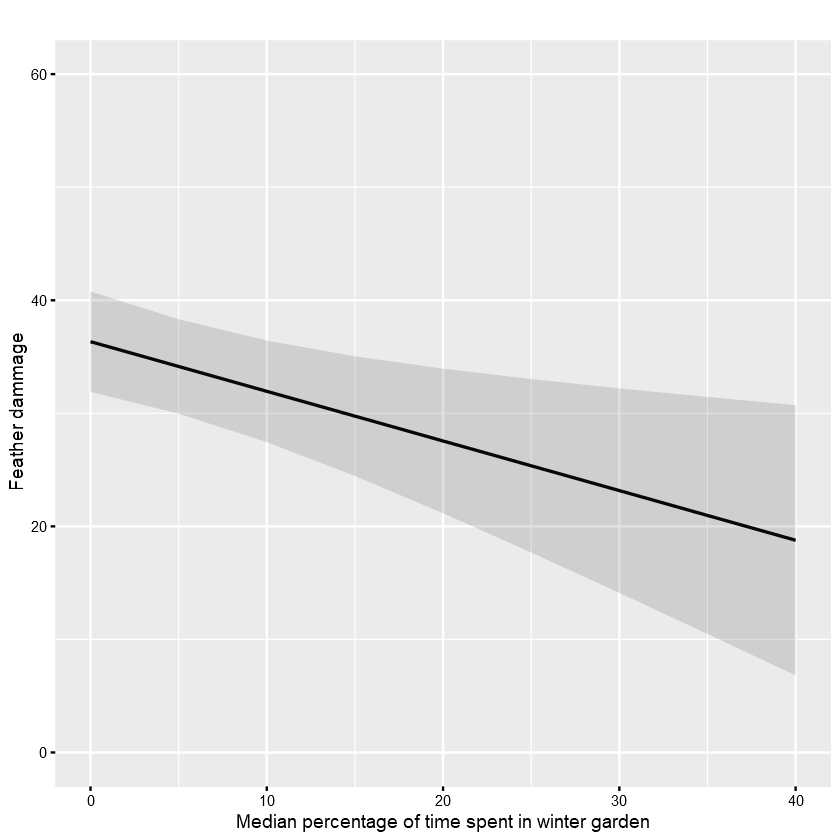

In [12]:
#square
sjPlot::plot_model(fit_feather, type = "pred", terms = c("perc_1_Zone_while_WG_open"), axis.lim = c(0,60), title='')+ xlab("Median percentage of time spent in winter garden")+ylab('Feather dammage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Feather_WG_pred.png'), width=4, height=4, bg = "transparent")

ggscatter(df, x = "perc_1_Zone_while_WG_open_10", y = "Feathers",color = "PenID")
ggsave(file.path(path_,'Feather_WG_scatter.png'),width=5, height=5)

## Severity HA5

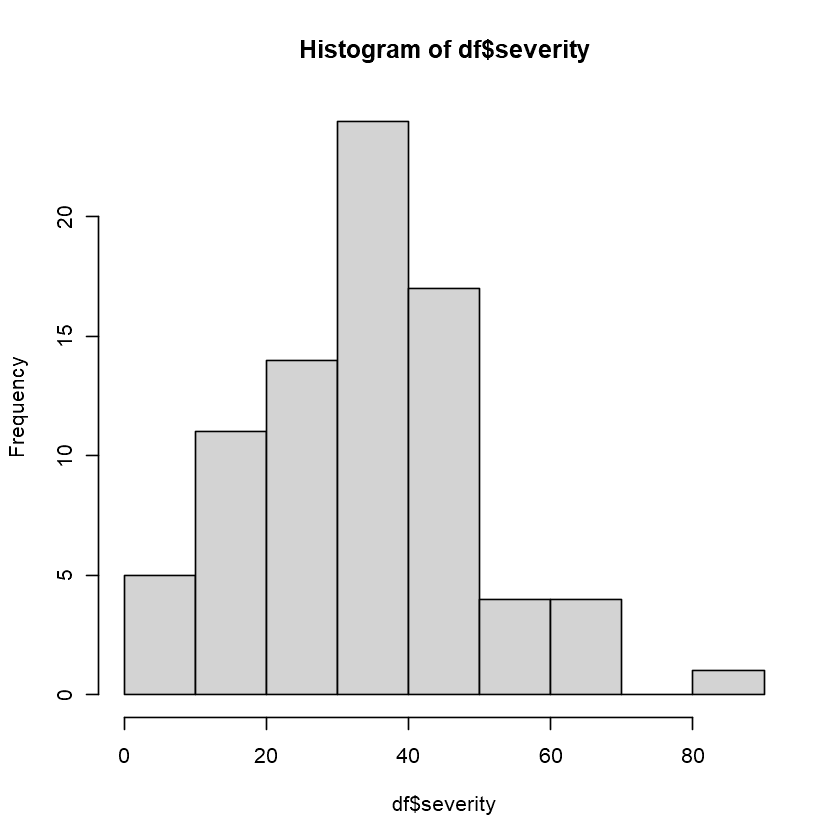

In [25]:
hist(df$severity)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
severityEndEarlyMvt,955.0674,955.0674,1,77.24004,4.353024,0.04024358


(Intercept) severityEndEarlyMvt 
         33.8391814           0.2739164

R2m,R2c
0.05141499,0.09018053


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ severityEndEarlyMvt + (1 | PenID)
   Data: df

REML criterion at convergence: 658.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1797 -0.7211 -0.0723  0.7336  3.2741 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   9.348   3.058  
 Residual             219.403  14.812  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
                    Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)          33.8392     2.1762 11.0243  15.550 7.59e-09 ***
severityEndEarlyMvt   0.2739     0.1313 77.2400   2.086   0.0402 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
svrtyEndErM -0.411

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


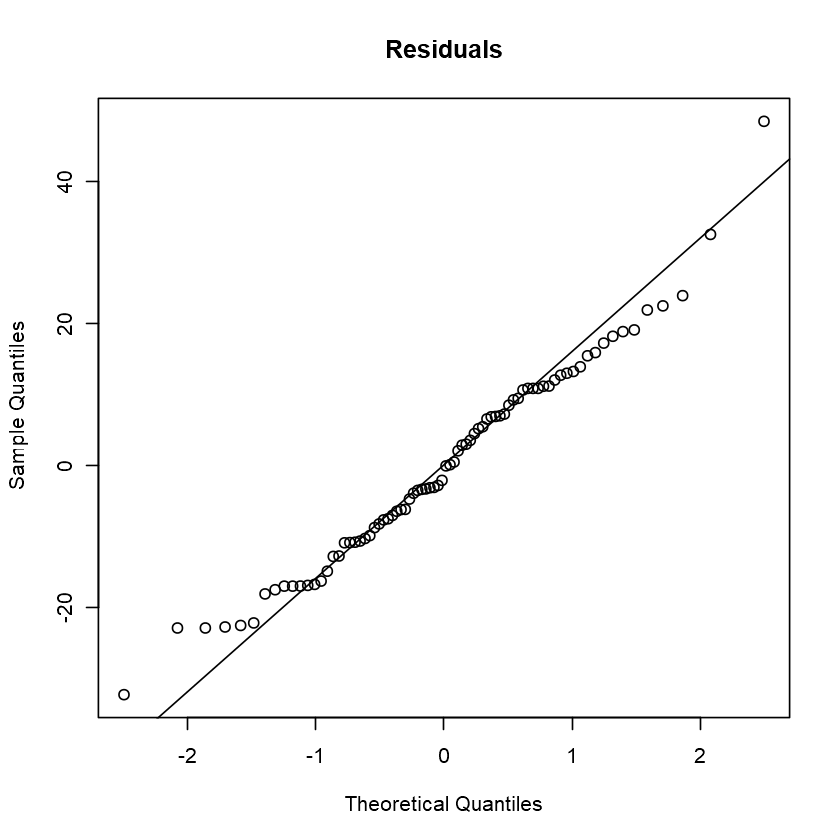

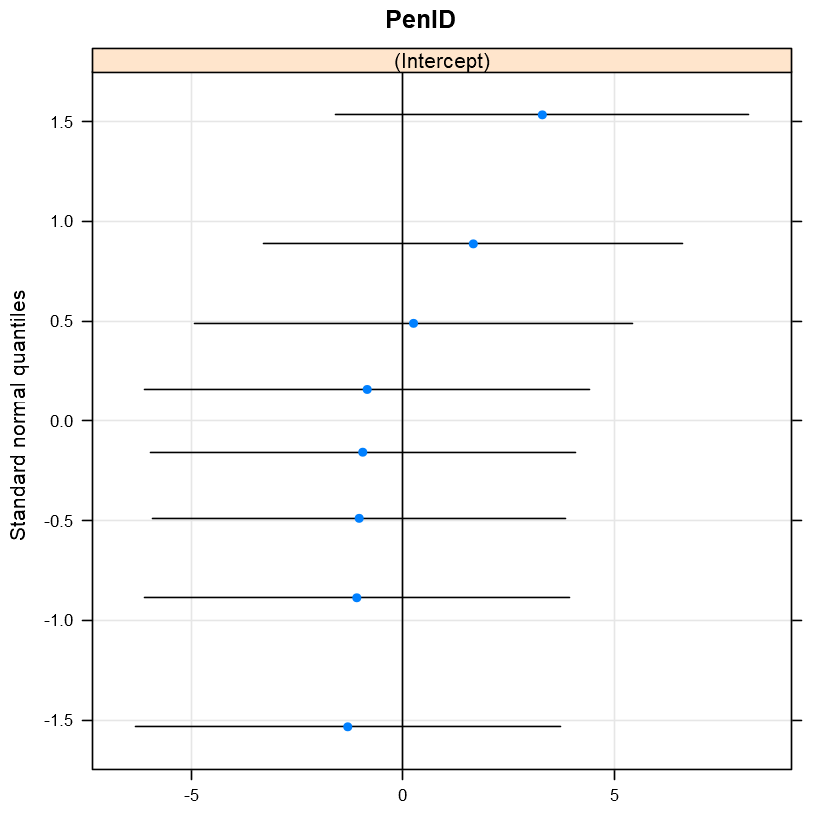

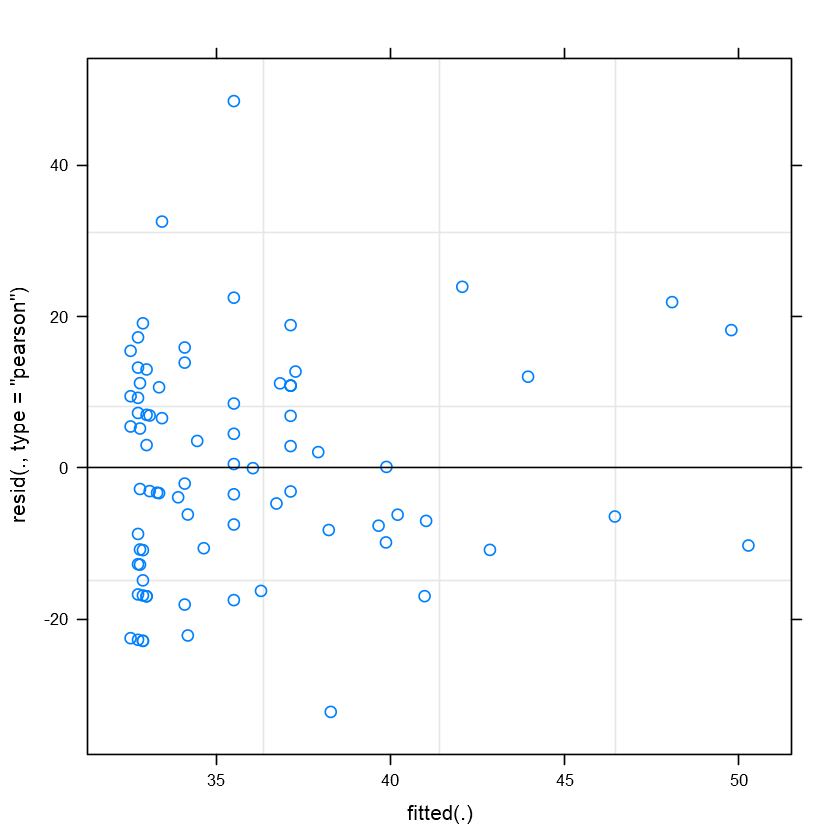

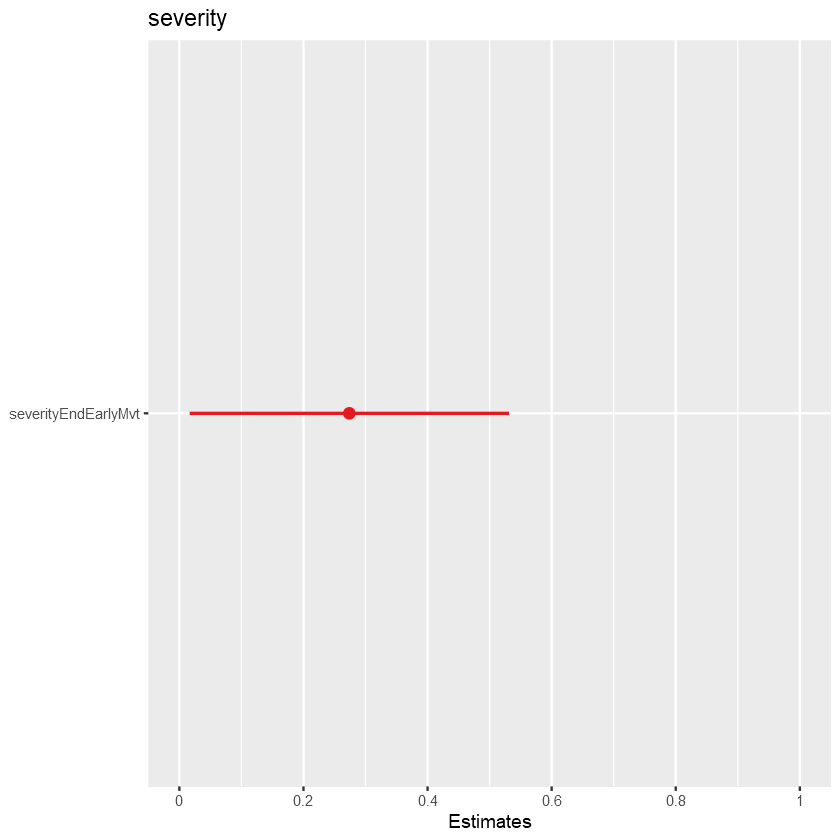

In [26]:
fit = lmerTest::lmer(severity ~ severityEndEarlyMvt + (1|PenID), data=df)
fit_severity = fit
anova(fit)
effCoef(fit)
r.squaredGLMM(fit_severity)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_nbrzonevisisted_over_3days,1026.14054,1026.14054,1,72.56555,4.72683908,0.03295749
perc_duration_5_Zone,4.30427,4.30427,1,72.37528,0.01982729,0.88841167
perc_1_Zone_while_WG_open,17.95474,17.95474,1,72.48517,0.08270718,0.77448233
BLUP_slopes1,377.15060,377.15060,1,69.35867,1.73731580,0.19181594
BLUP_slopes2,599.36632,599.36632,1,72.96817,2.76093579,0.10088256
Predictability_mean,1024.77936,1024.77936,1,72.02363,4.72056888,0.03309512


(Intercept) nbr_nbrzonevisisted_over_3days 
                   68.22692590                    -1.55720266 
          perc_duration_5_Zone      perc_1_Zone_while_WG_open 
                   -0.01085631                    -0.07123043 
                  BLUP_slopes1                   BLUP_slopes2 
                   -6.06865826                   -14.51652433 
           Predictability_mean 
                  -16.29377039

R2m,R2c
0.1086704,0.1533176


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ nbr_nbrzonevisisted_over_3days + perc_duration_5_Zone +  
    perc_1_Zone_while_WG_open + BLUP_slopes1 + BLUP_slopes2 +  
    Predictability_mean + (1 | PenID)
   Data: df

REML criterion at convergence: 637.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.88050 -0.72008  0.04631  0.53131  2.97935 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)  11.45    3.383  
 Residual             217.09   14.734  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
                                Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                     68.22693   12.60626  70.70301   5.412 8.08e-07
nbr_nbrzonevisisted_over_3days  -1.55720    0.71624  72.56555  -2.174   0.0330
perc_duration_5_Zone            -0.01086    0.07710  72.37528  -0.141   0.8884
perc_1_Zone_while_WG_open       -0.07123    0.24768  72.48517  -0.

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


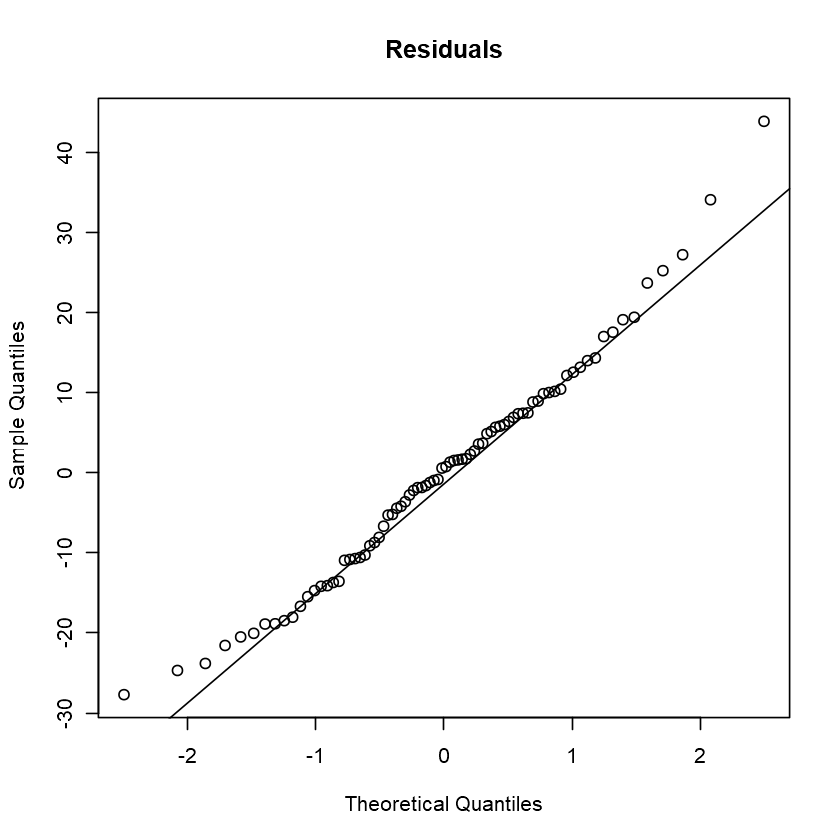

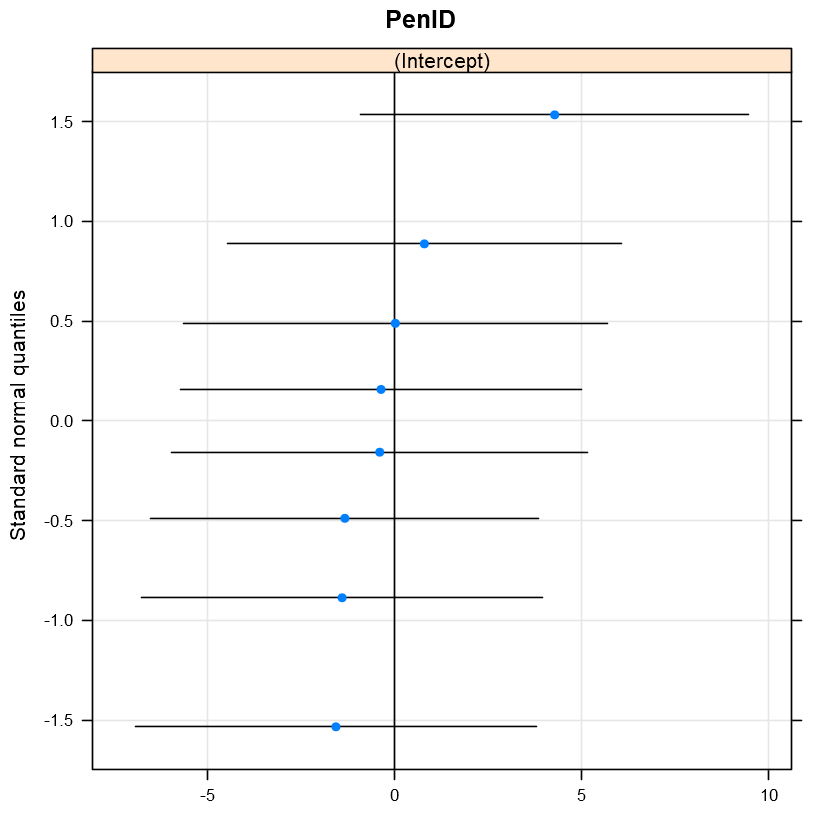

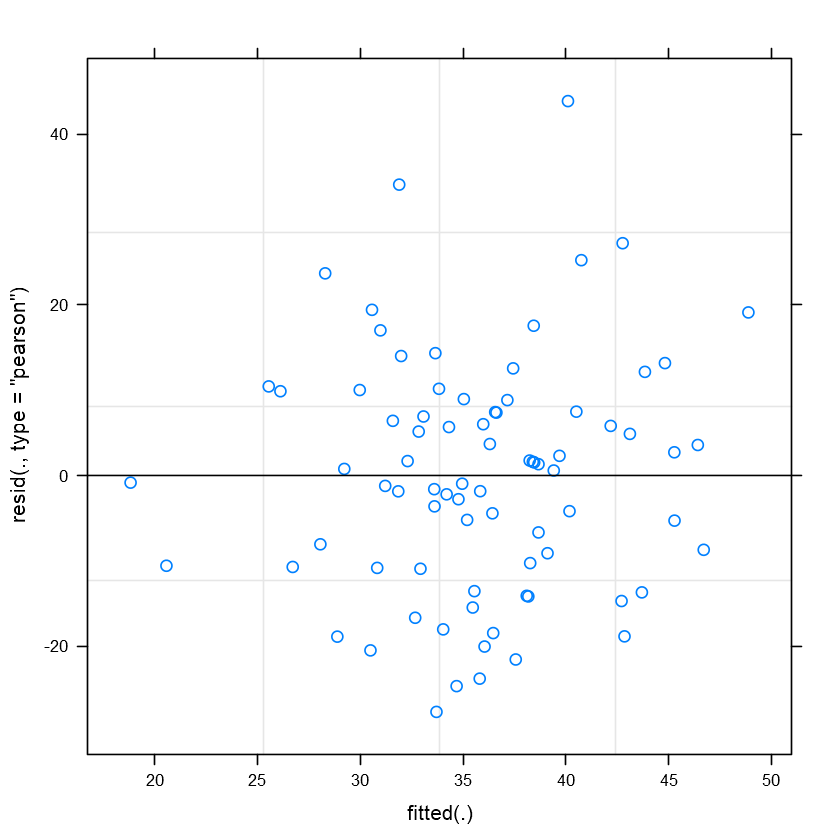

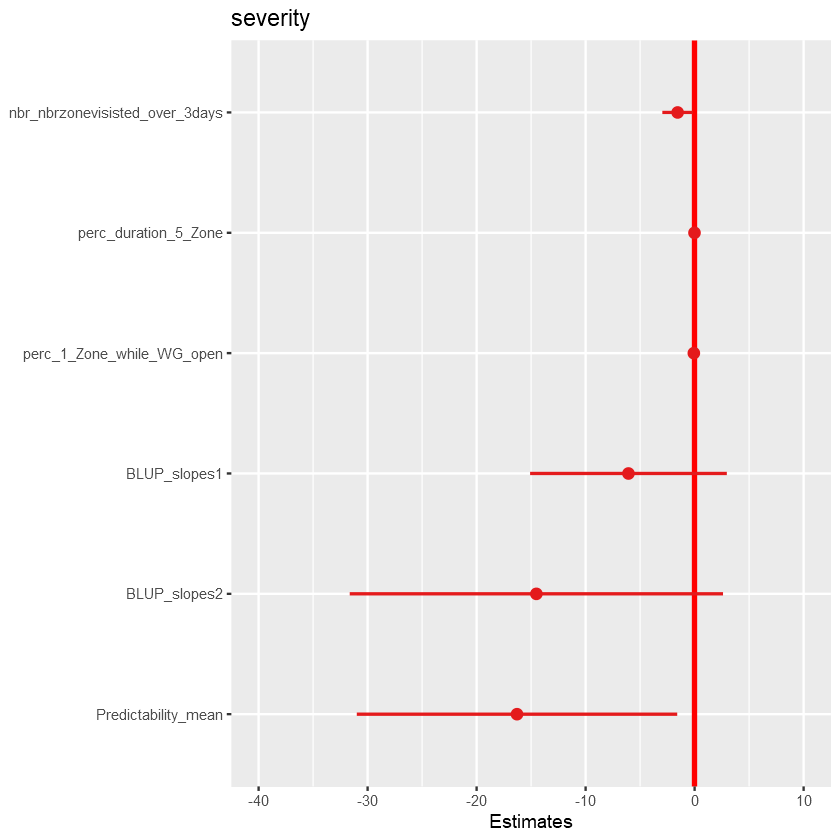

In [34]:
fit = lmerTest::lmer(severity ~ nbr_nbrzonevisisted_over_3days + perc_duration_5_Zone + perc_1_Zone_while_WG_open + BLUP_slopes1 + BLUP_slopes2 + Predictability_mean+(1|PenID), data=df)
fit_severity = fit
anova(fit)
effCoef(fit)
r.squaredGLMM(fit_severity)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

###stable with LASSO score with bootstrap
set.seed(123)    
li_mvt = c('nbr_first3days_no_mvt','perc_duration_5_Zone','perc_1_Zone_while_WG_open','BLUP_slopes1','BLUP_slopes2',
           'Predictability_mean')
df_ = df[c(li_mvt,c('severity'))]
df_ = na.omit(df_)
df_[c(li_mvt,c('severity'))] = scale(df_[c(li_mvt,c('severity'))])
dim(df_)
y = df_ %>% select(severity) %>% as.matrix() #'Feathers','severity','weight'
X = df_ %>% select(li_mvt) %>% as.matrix()
cvfit = glmnet(X, y, alpha=1, standardize=TRUE)
#nonzero coefficients (Df), the percent (of null) deviance explained (%dev) and the value of λ (Lambda). A
print(cvfit)
plot(cvfit, label=TRUE)
legend("topleft", lwd = 1, col = 1:6, legend = colnames(X), cex = .7)
#coef(cvfit, s = "lambda.min")
#coef(cvfit, s = "lambda.1se")
coef(cvfit)

In [28]:
tab_model(fit_severity, file=file.path(path_,'LMERSEVERITY.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERSEVERITY.html'), file.path(path_,'LMERSEVERITY.png'), zoom=3, cliprect = c(0, 5, 600, 270))

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



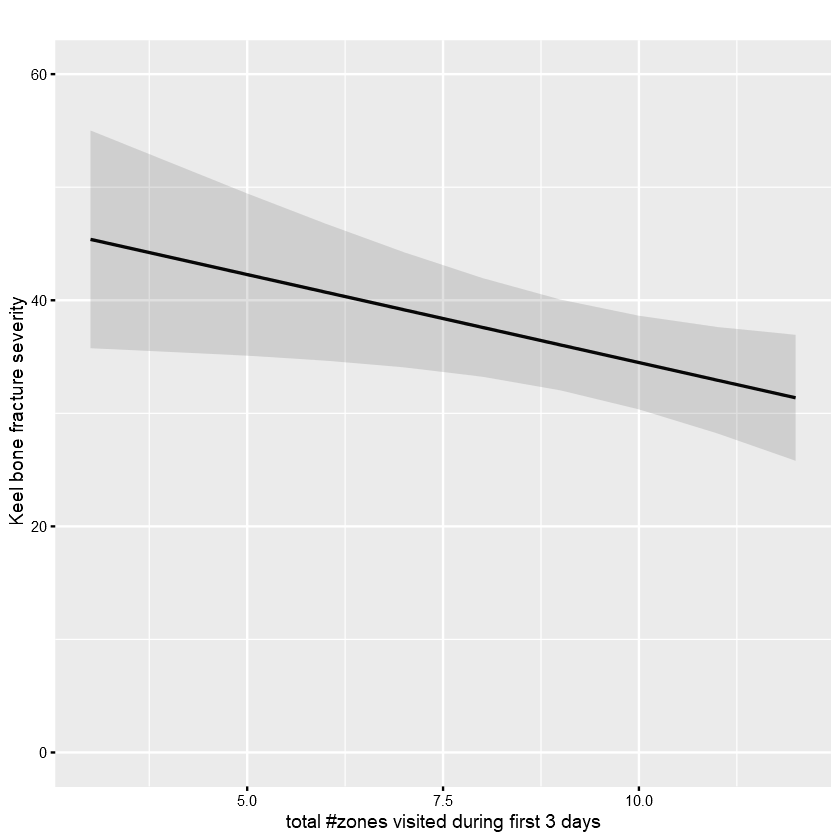

In [29]:
sjPlot::plot_model(fit_severity, type="pred", terms=c("nbr_nbrzonevisisted_over_3days"), axis.lim = c(0,60), title='')+ xlab("total #zones visited during first 3 days")+ylab('Keel bone fracture severity')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Severity_nbr_days_nomvt_pred.png'), width=4, height=4, bg = "transparent")

ggscatter(df, x = "nbr_first3days_no_mvt", y = "severity",color = "PenID")
ggsave(file.path(path_,'Severity_nbr_days_nomvt_scatter.png'),width=5, height=5)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



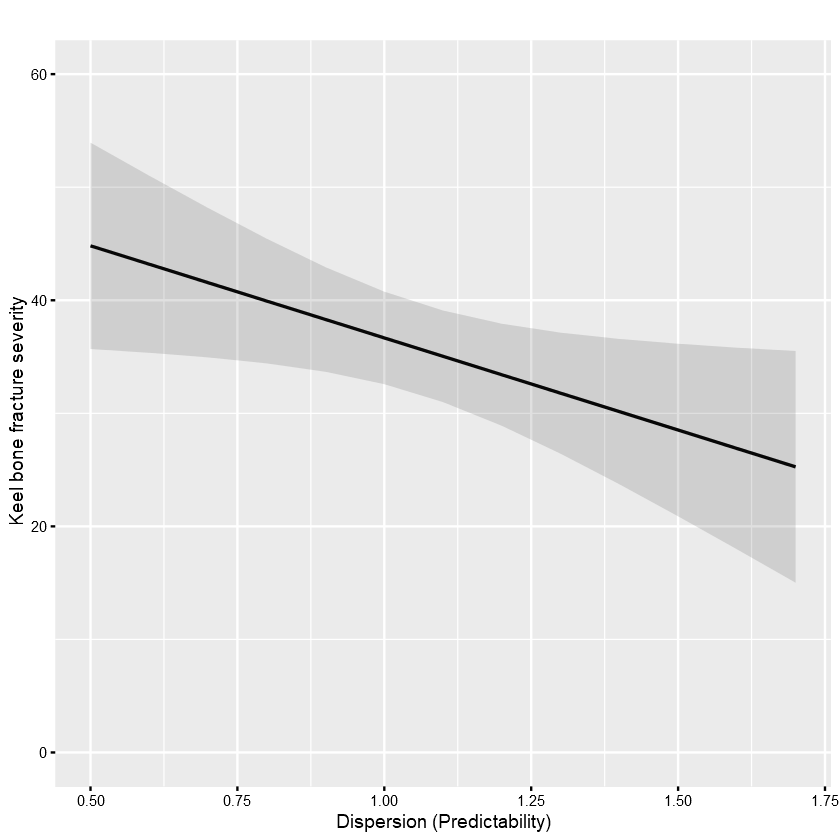

In [30]:
sjPlot::plot_model(fit_severity, type = "pred", terms = c("Predictability_mean"), axis.lim = c(0,60), title='')+xlab("Dispersion (Predictability)")+ylab('Keel bone fracture severity')+
      theme(plot.background = element_rect(fill = "transparent", colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Severity_Predictability_mean.png'), width=4, height=4, bg = "transparent")

# Weight

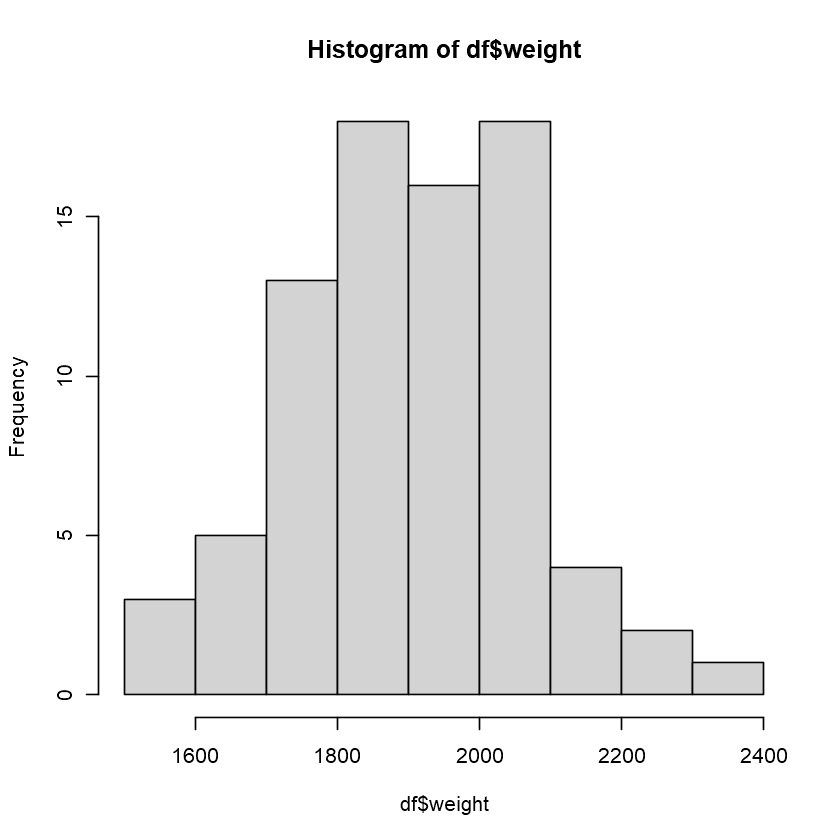

In [31]:
hist(df$weight)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_nbrzonevisisted_over_3days,23.93972,23.93972,1,72.85501,0.2218095,0.63907174
perc_duration_5_Zone,193.08064,193.08064,1,70.44777,1.7889565,0.18535563
perc_1_Zone_while_WG_open,599.45015,599.45015,1,70.39688,5.5541056,0.02122414
BLUP_slopes1,119.43300,119.43300,1,67.38681,1.1065866,0.29658281
BLUP_slopes2,12.02563,12.02563,1,72.27244,0.1114214,0.73949822
Predictability_mean,291.06788,291.06788,1,72.98714,2.6968410,0.10484933


(Intercept) nbr_nbrzonevisisted_over_3days 
                    74.8097800                     -0.2433969 
          perc_duration_5_Zone      perc_1_Zone_while_WG_open 
                     0.0735629                     -0.4164762 
                  BLUP_slopes1                   BLUP_slopes2 
                    -3.4262283                     -2.0956203 
           Predictability_mean 
                    -8.9088836

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
perc_gain_weight ~ nbr_nbrzonevisisted_over_3days + perc_duration_5_Zone +  
    perc_1_Zone_while_WG_open + BLUP_slopes1 + BLUP_slopes2 +  
    Predictability_mean + (1 | PenID)
   Data: df

REML criterion at convergence: 589.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8778 -0.6595 -0.1012  0.7005  2.3767 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)  16.04    4.004  
 Residual             107.93   10.389  
Number of obs: 80, groups:  PenID, 8

Fixed effects:
                               Estimate Std. Error       df t value Pr(>|t|)
(Intercept)                    74.80978    9.17989 72.05284   8.149 8.03e-12
nbr_nbrzonevisisted_over_3days -0.24340    0.51680 72.85501  -0.471   0.6391
perc_duration_5_Zone            0.07356    0.05500 70.44777   1.338   0.1854
perc_1_Zone_while_WG_open      -0.41648    0.17672 70.39688  -2.357   0.021

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


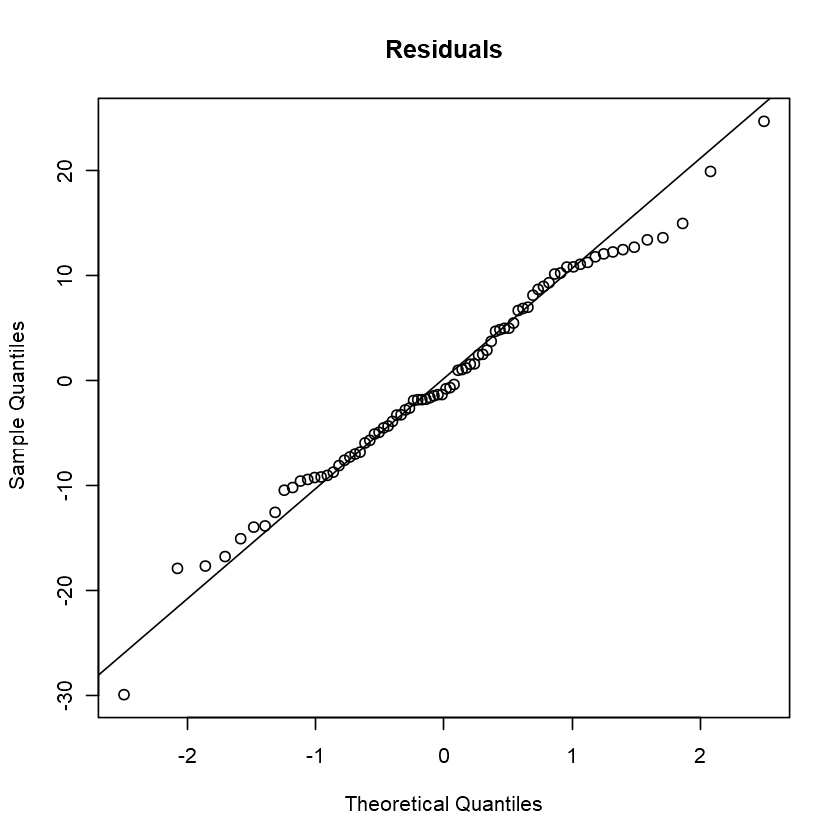

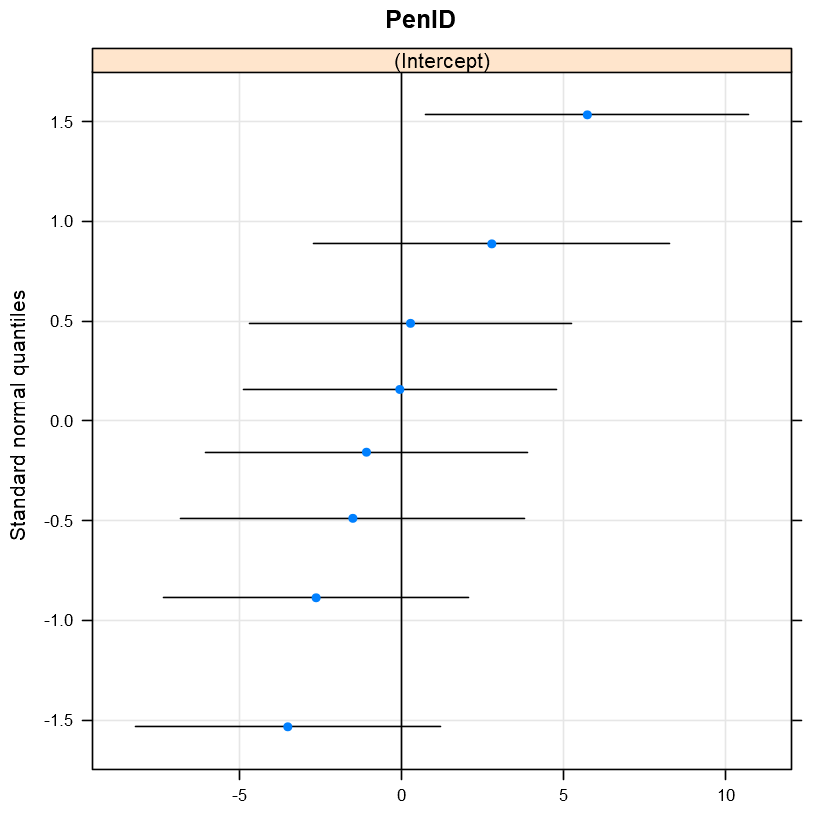

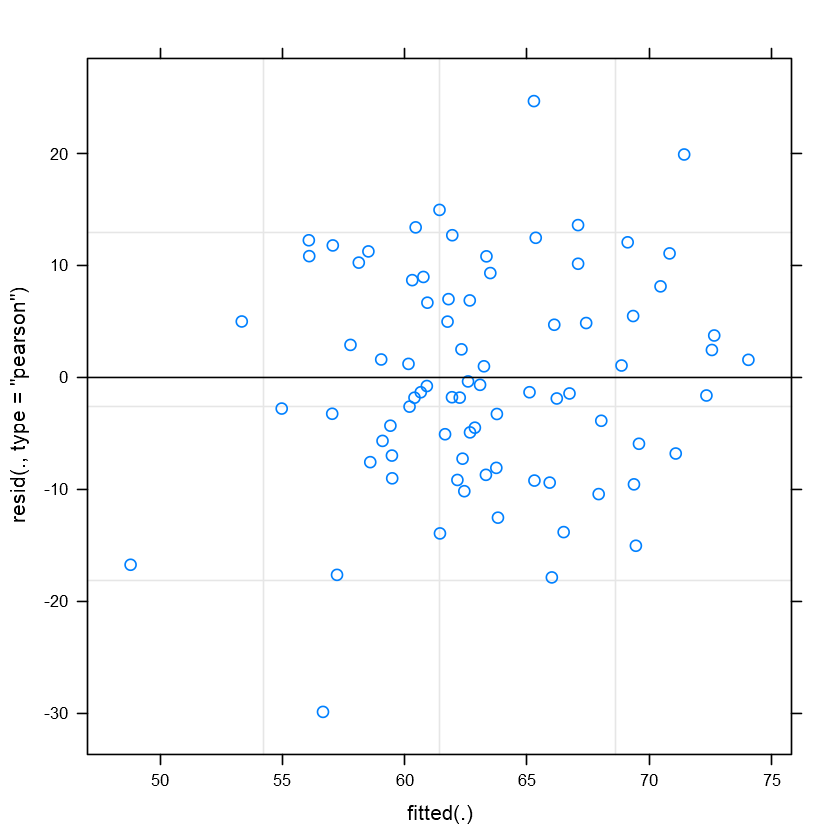

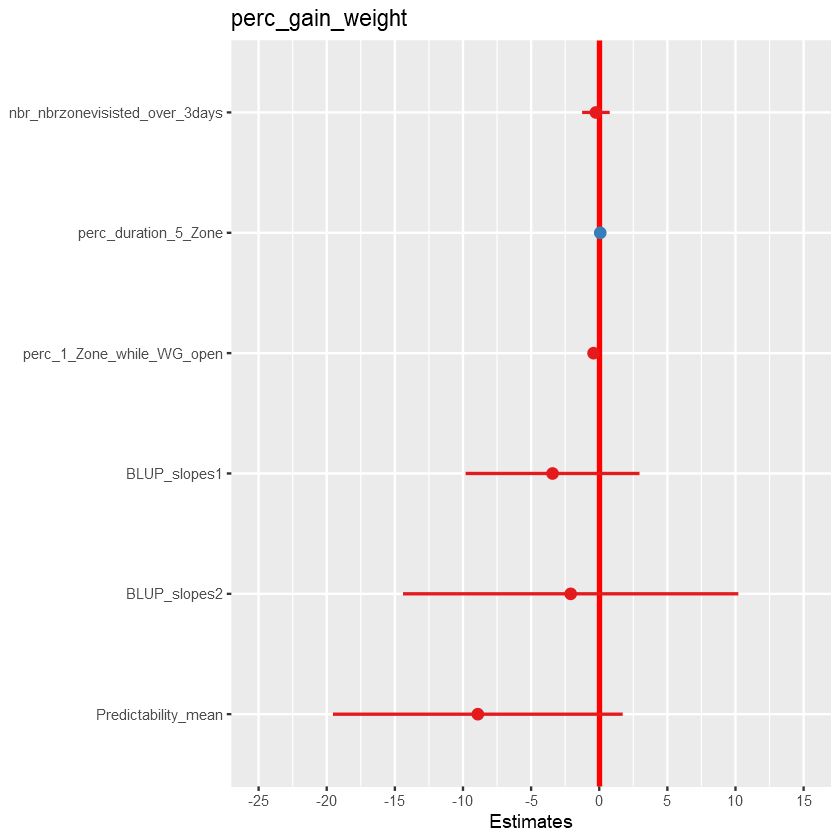

In [18]:
fit = lmerTest::lmer(perc_gain_weight ~ nbr_nbrzonevisisted_over_3days + perc_duration_5_Zone + perc_1_Zone_while_WG_open + BLUP_slopes1 + BLUP_slopes2 + Predictability_mean + (1|PenID), data=df)
fit_weight = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

###stable with LASSO score with bootstrap
set.seed(123)    
li_mvt = c('nbr_first3days_no_mvt','perc_duration_5_Zone_10','perc_1_Zone_while_WG_open','BLUP_slopes1','BLUP_slopes2',
           'Predictability_mean')
df_ = df[c(li_mvt,c('weight'))]
df_ = na.omit(df_)
df_[c(li_mvt,c('weight'))] = scale(df_[c(li_mvt,c('weight'))])
dim(df_)
y = df_ %>% select(weight) %>% as.matrix() #'Feathers','severity','weight'
X = df_ %>% select(li_mvt) %>% as.matrix()
cvfit = glmnet(X, y, alpha=1, standardize=TRUE)
#nonzero coefficients (Df), the percent (of null) deviance explained (%dev) and the value of λ (Lambda). A
print(cvfit)
plot(cvfit, label=TRUE)
legend("topleft", lwd = 1, col = 1:6, legend = colnames(X), cex = .7)
#coef(cvfit, s = "lambda.min")
#coef(cvfit, s = "lambda.1se")
coef(cvfit)

In [19]:
tab_model(fit_weight, file=file.path(path_,'LMERWEIGHT.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERWEIGHT.html'), file.path(path_,'LMERWEIGHT.png'), zoom=3, cliprect = c(0, 5, 600, 270))

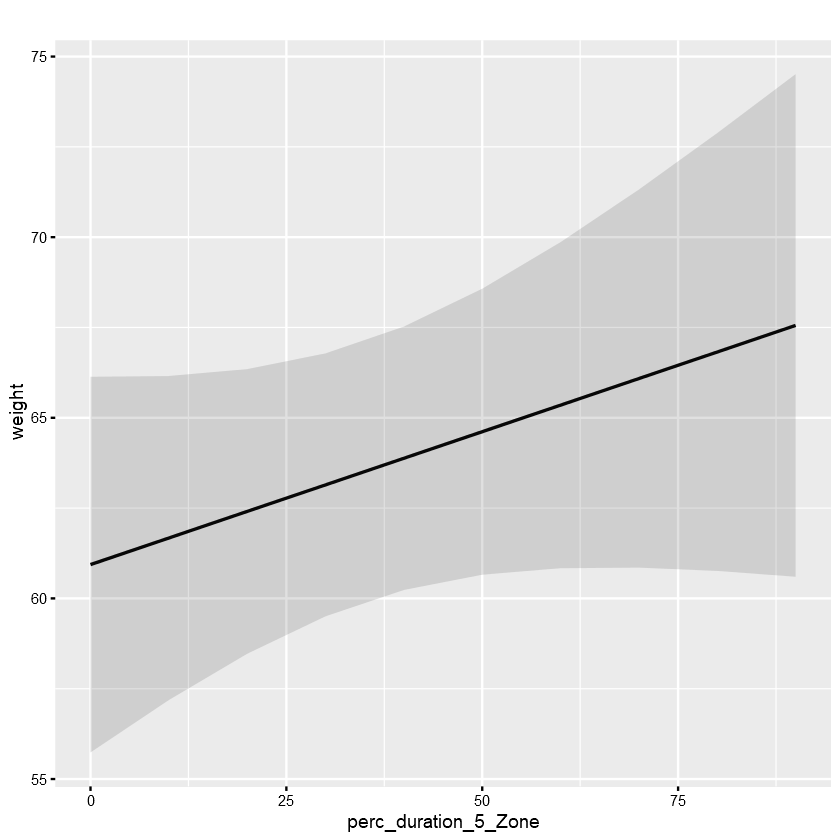

In [20]:
sjPlot::plot_model(fit_weight, type = "pred", terms = c("perc_duration_5_Zone"), title='')+ xlab("perc_duration_5_Zone")+ylab('weight')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Weight_perc_duration_5_Zone.png'), width=4, height=4, bg = "transparent")

ggscatter(df, x = "perc_duration_5_Zone", y = "severity",color = "PenID")
ggsave(file.path(path_,'Weight_perc_duration_5_Zone_scatter.png'),width=5, height=5)

#TO READ AND PERHAPS DO
library('glmmLasso')
#https://www.rdocumentation.org/packages/lmmen/versions/1.0/topics/cv.glmmLasso
lm1 = glmmLasso(severity ~ nbr_first3days_no_mvt+perc_duration_5_Zone_10+perc_1_Zone_while_WG_open_10+BLUP_slopes1+BLUP_slopes2+Predictability_mean+BehaviouralType, 
                rnd = list(PenID=~1), lambda=100, data = df, family = gaussian(link="identity"),
                final.re = TRUE) #rnd = list(PenID=~1) #list(PenID=~1)
summary(lm1)

cv.glmmLasso(severity ~ nbr_first3days_no_mvt+perc_duration_5_Zone_10+perc_1_Zone_while_WG_open_10+BLUP_slopes1+BLUP_slopes2+Predictability_mean+BehaviouralType,
             data=df, rnd=list(PenID=~1), lambda = seq(500, 0, by = -5), family = stats::gaussian(link = "identity"))

library('lassoscore')
cvfit = lassoscore(y, X, lambda=1, family=c("gaussian"), tol = .Machine$double.eps, maxit=100, resvar = NULL, verbose=FALSE, subset = NULL)
cvfit$scores
cvfit$p.model

In [21]:
#LASSO: we do not have so much data to estimate the lambda, ross validation might not be very good with only 80 obs...

In [2]:
plot_models(c(fit_feather, fit_severity), vline.color = "red")

ERROR: Error in plot_models(c(fit_feather, fit_severity), vline.color = "red"): impossible de trouver la fonction "plot_models"
